# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-5.1.-Fitting-a-regression-line-to-the-student-debt-data" data-toc-modified-id="Exercise-5.1.-Fitting-a-regression-line-to-the-student-debt-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 5.1. Fitting a regression line to the student debt data</a></div><div class="lev1 toc-item"><a href="#Exercise-5.2.-Kleiber’s-law-and-linear-regression" data-toc-modified-id="Exercise-5.2.-Kleiber’s-law-and-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 5.2. Kleiber’s law and linear regression</a></div><div class="lev1 toc-item"><a href="#Exercise-5.3.-The-Least-Squares-cost-function-and-a-single-Newton-step" data-toc-modified-id="Exercise-5.3.-The-Least-Squares-cost-function-and-a-single-Newton-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 5.3. The Least Squares cost function and a single Newton step</a></div><div class="lev1 toc-item"><a href="#Exercise-5.6.-Compare-the-Least-Squares-and-Least-Absolute-Deviation-costs" data-toc-modified-id="Exercise-5.6.-Compare-the-Least-Squares-and-Least-Absolute-Deviation-costs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 5.6. Compare the Least Squares and Least Absolute Deviation costs</a></div><div class="lev1 toc-item"><a href="#Exercise-5.7.-Empirically-confirm-convexity-for-a-toy-dataset" data-toc-modified-id="Exercise-5.7.-Empirically-confirm-convexity-for-a-toy-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 5.7. Empirically confirm convexity for a toy dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-5.9.-Housing-price-and-Automobile-Miles-per-Gallon-prediction" data-toc-modified-id="Exercise-5.9.-Housing-price-and-Automobile-Miles-per-Gallon-prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction</a></div><div class="lev1 toc-item"><a href="#Exercise-5.11.-Multi-output-regression" data-toc-modified-id="Exercise-5.11.-Multi-output-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 5.11. Multi-output regression</a></div>

In [258]:
# import autograd-wrapped numpy
import autograd.numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

# datapath to data
datapath = '../mlrefined_datasets/superlearn_datasets/'

# Exercise 4.1. Determining the eigenvalues of a symmetric matrix
## (a) 
By eigenvalue decomposition
$$
\begin{align}
C = VAV^{-1} \\
\end{align}
$$
where

$$
\begin{align}
V = [X_1, X_2, ..., X_n] \\
A = diag(\lambda_i)
\end{align}
$$




$X_i$ is the eigenvecrir of C and $\lambda_i$ is the eigenvalue.
Therefore
$$
\begin{align}
z^TCz = z^TVAV^{-1}z = (z^TV)AV^Tz = (V^Tz)^TA(V^Tz) \\
let \ \ b = V^Tz \ \ then \\
(V^Tz)^TA(V^Tz) = b^TAb = \sum_i^n{\lambda_ib_i^2}
\end{align}
$$
Since all eigenvalues are nonegative


$$
\begin{align}
\lambda_ib_i^2 \geq 0 \rightarrow \sum_i^n{\lambda_ib_i^2} \geq 0
\end{align}
$$






## (b)
From (a), we can decompose C into
$$
\begin{align}
C = VAV^{-1} \\
z^TCz = (V^Tz)^TA(V^Tz) \\
\end{align}
$$
Since $z^TCz \geq 0$ for all $z \in R^n$
$$
\begin{align}
let \ \ \ \ z = Ve_i \ \ \ \forall i = 0,1,...n \ \ \  then \\
z^TCz = (V^Tz)^TA(V^Tz) = (V^TVe_i)^TA(V^TVe_i) = e_i^TAe_i = \lambda_i \geq 0 \ \ \ \forall i = 0,1,...n
\end{align}
$$
Therefore all eigenvalues are nonnegative




## (c)
$$
\begin{align}
\nabla g = b + (C^T + C)w = 2Cw + b \\
\nabla^2g = 2C \\
\end{align}
$$
Let $\lambda_1,\lambda_2$ be the eigenvalues of C

$$
\begin{align}
\lambda_1 + \lambda_2 = 1 + 1 = 2 \\
\lambda_1\lambda_2 = 1x1-1x1 = 0 \\
\lambda_1 = 0 \geq 0 \\
\lambda_2 = 2 \geq 0
\end{align}
$$
Therefore, g is positive semi-definite for all $w \in R^2$. Hence g is a convex function.


## (d)
Let $\lambda_min$ be the smallest eigenvalues of C. 
$$
Cx = \lambda_{min} x \\
(C + \lambda I)x = Cx + \lambda x = \lambda_{min} x + \lambda x = (\lambda_{min} + \lambda)x \\
\lambda_{min} + \lambda > 0 \rightarrow \lambda >  \lambda_{min}
$$
To prove if $\lambda > \lambda_{min}$, all eigenvalues are positive, let's assume that there is still a negative eigenvalue $\lambda'$ after setting $\lambda > -\lambda_{min}$
$$
\begin{align}
(C + \lambda I)x = Cx + \lambda x = \lambda' x \\
Cx = (\lambda' - \lambda)x  
\end{align}
$$
Therefore $\lambda' - \lambda$ is an eigenvalue of C. 
$$
\begin{align}
\lambda > -\lambda_{min} \rightarrow \lambda' - \lambda < \lambda' + \lambda_{min} \\
\lambda' \leq 0 \rightarrow \lambda' + \lambda_{min} \leq \lambda_{min} \\
\lambda' - \lambda < \lambda_{min}
\end{align}
$$
which contradict to our assumption that $\lambda_{min}$ is the minimum eigenvalues. Therefore, all eigenvalues of $(C + \lambda I)$ should be positive. Hence, if $\lambda > \lambda_{min}$ all eigenvalues are positive.

# Exercise 4.5. Newton’s method II
## (a)
$$
\begin{align}
\nabla g = \frac{2e^{w^Tw}w}{1+e^{w^Tw}} \\
\nabla g = 0 \rightarrow \frac{2e^{w^Tw}w}{1+e^{w^Tw}} = 0 \rightarrow 2e^{w^Tw}w = 0 \rightarrow w = 0
\end{align}
$$
So the stationary point is [0, 0]

## (b)

$$
\begin{align}
\nabla^2 g = \frac{ 4e^{w^Tw}ww^T + 2e^{w^Tw}I}{1+e^{w^Tw}} - \frac{2e^{w^Tw}w*2w^Te^{w^Tw}}{(1+e^{w^Tw})^2} \\
= \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2ww^T + I) - \frac{4e^{2w^Tw}}{(1+e^{w^Tw})^2}(ww^T) \\
= \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2ww^T + I - \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}ww^T) \\
= \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})ww^T + I) \\
\forall x \in R^n \\
x^T\nabla^2 gx = \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})x^Tww^Tx + x^TIx) \\
= \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})(w^Tx)^T(w^Tx) + x^Tx) \\
\frac{e^{w^Tw}}{1+e^{w^Tw}} < 1 \rightarrow 1-\frac{e^{w^Tw}}{1+e^{w^Tw}} > 0 \\
2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})(w^Tx)^T(w^Tx) \geq 0 \\ 
x^Tx \geq 0 \\
(2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})(w^Tx)^T(w^Tx) + x^Tx)  \geq 0 \\
\frac{2e^{w^Tw}}{1+e^{w^Tw}} > 0 \\
\frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2(1-\frac{e^{w^Tw}}{1+e^{w^Tw}})(w^Tx)^T(w^Tx) + x^Tx) \geq 0 \\
So \ \ x^T\nabla^2 gx \geq 0 f \forall x \in R \\
So \ \ \nabla^2 g \ \ PSD \\
So \ \ g \ \ convex

\end{align}
$$


## (c)
$$
g = log(1+e^{w^Tw}) \\
\nabla g = \frac{2e^{w^Tw}w}{1+e^{w^Tw}} \\
\nabla g^2 = \frac{ 2e^{w^Tw}}{1+e^{w^Tw}}(2ww^T + I) - \frac{4e^{2w^Tw}}{(1+e^{w^Tw})^2}(ww^T) 
$$

In [259]:
def plot(cost_hist, title):
    x = np.arange(len(cost_hist))
    plt.plot(x, cost_hist)
    plt.title(f"Cost history of initial w {title}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost history")
    plt.show()


def plot_contour(w_hist, title, ran):
    x = np.linspace(-ran, ran, 1000)
    y = np.linspace(-ran, ran, 1000)
    vx, vy = np.meshgrid(x, y)
    inp = np.concatenate((vx[:, :, np.newaxis], vy[:, :, np.newaxis]), -1)
    z = np.log(1+np.exp((inp ** 2).sum(-1)))
    plt.contour(x, y, z, )
    plt.plot([w[0] for w in w_hist],[w[1] for w in w_hist], 's-', color='b', label="optimization curve")
    plt.title(f"Contour of initial w w {title}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost history")
    plt.legend()
    plt.show()



def func(w):
    return np.log(1+np.exp(w.T@w))

def compute_first(w):
    a = 2 * np.exp(w.T @ w) * w
    b = 1 + np.exp(w.T @ w)
    return a / b

def compute_second(w):
    a = 2 * np.exp(w.T @ w) / (1 + np.exp(w.T @ w))
    return a * (2*w@w.T + np.eye(w.shape[0])) - a*a*w@w.T


    


def train(epoch, w):
    w_hist = [w.copy()]
    cost_hist = [func(w).item()]
    for i in tqdm(range(epoch)):
        first = compute_first(w)
        second = compute_second(w)
        d = np.linalg.solve(second, second @ w - first)
        w -= d
        cost_hist.append(func(w).item())
        w_hist.append(w.copy())
    return w_hist, cost_hist



100%|██████████| 10/10 [00:00<00:00, 10257.53it/s]


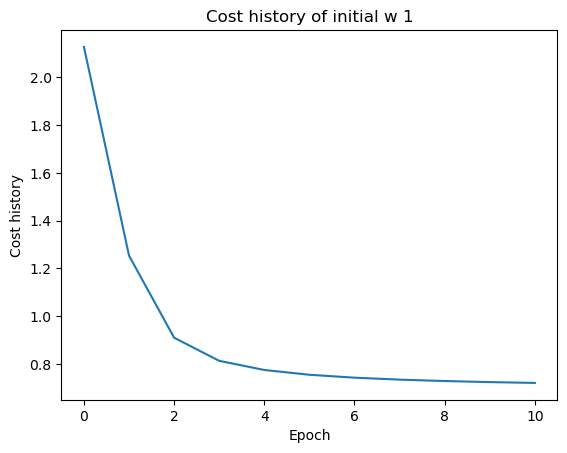

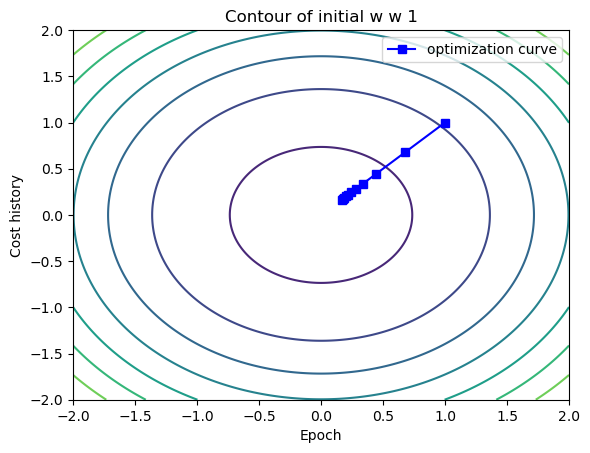

In [260]:
# c
w = np.ones((2, 1))
w_hist, cost_hist = train(10, w)
plot(cost_hist, 1)
plot_contour(w_hist, 1, 2)

100%|██████████| 10/10 [00:00<00:00, 10024.63it/s]


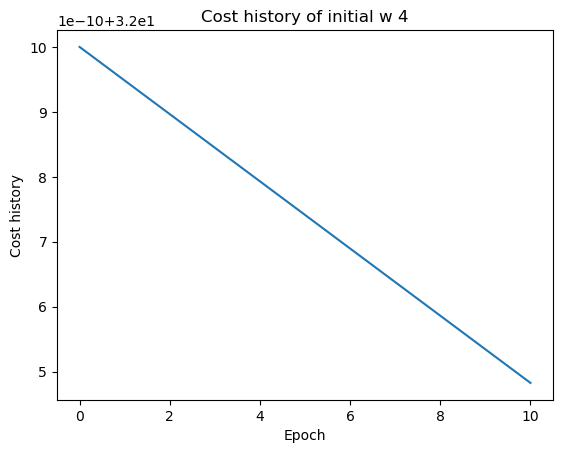

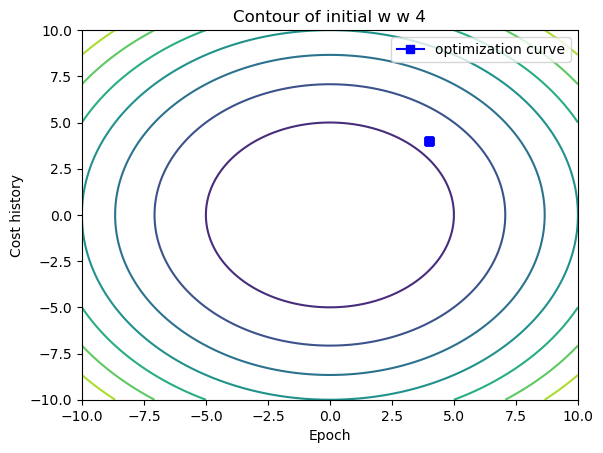

In [261]:
# d
w = 4 * np.ones((2, 1))
w_hist, cost_hist = train(10, w)
plot(cost_hist, 4)
plot_contour(w_hist, 4, 10)

# Exercise 5.2. Kleiber’s law and linear regression

## (a)

w0=6.814734774379879 w1=0.6528120976176701


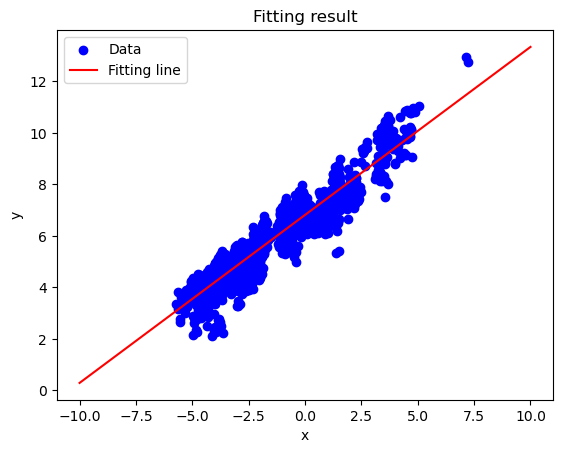

In [262]:
# import the dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
x = np.log(x.transpose())
y = np.log(y.transpose())


x = np.concatenate([np.ones(x.shape), x], axis=1)
w = np.linalg.lstsq(x, y)[0]

print(f"w0={w[0, 0]} w1={w[1, 0]}")
# Plot data
plt.scatter(x[:, 1], y[:, 0], color = "b", label="Data")
line_x = [-10, 10]
line_y = [w[0, 0] + w[1, 0] * x for x in line_x]
plt.plot(line_x, line_y, color="r", label="Fitting line")
plt.title("Fitting result")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## (b)
$$
log(y) = w_0 + w_1log(x) = 6.8 + 0.65log(x)
$$
$$
y = e^{6.8 + 0.65log(x)}
$$


## (c)
$$
y = e^{6.8 + 0.65log(10)} = 4010.54 \ kj = 959459.33 \ calorie
$$

# Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction

In [278]:
# import the dataset
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]


mean = x.mean(1, keepdims=True)
std = x.std(1, keepdims=True)
x = (x - mean) / std
x = x.transpose()
y = y.transpose()
x = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)
w = np.linalg.lstsq(x, y)[0]

pred = x @ w

rmse = np.sqrt(((pred - y) ** 2).mean())
mad = np.abs(pred - y).mean()

print(f"RMSE: {rmse}")
print(f"MAD: {mad}")

RMSE: 4.679506300635516
MAD: 3.2729446379969374


By using least square solution, the RMSE 4.6 and MAD is 3.27. If the unit is K dollar, then the loss is 4600, 3200, respectively, a little bit higher than expected.

In [280]:
# import the dataset
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
idx = (~np.isnan(x)).all(0)
x = x[:, idx]
y = y[:, idx]


mean = x.mean(1, keepdims=True)
std = x.std(1, keepdims=True)
x = (x - mean) / std
x = x.transpose()
y = y.transpose()
x = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)


w = np.linalg.lstsq(x, y)[0]

pred = x @ w

rmse = np.sqrt(((pred - y) ** 2).mean())
mad = np.abs(pred - y).mean()

print(f"RMSE: {rmse}")
print(f"MAD: {mad}")


RMSE: 3.293551418302203
MAD: 2.4993098325008716


By using least square solution, the RMSE 3.3 and MAD is 2.5. If the unit is K dollar, then the loss is 3300, 2500, respectively, very close to the expected value.